
<img src='kaggle_image.png'>

<img src='FakeNews_WordCloud.jpg'>


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sb
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
# Reading the data set that has been downloaded from Kaggle.com
df  = pd.read_csv("/Users/Yemre/Desktop/CapStone/fake.csv")

In [5]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12999 entries, 0 to 12998
Data columns (total 20 columns):
uuid                  12999 non-null object
ord_in_thread         12999 non-null int64
author                10575 non-null object
published             12999 non-null object
title                 12319 non-null object
text                  12953 non-null object
language              12999 non-null object
crawled               12999 non-null object
site_url              12999 non-null object
country               12823 non-null object
domain_rank           8776 non-null float64
thread_title          12987 non-null object
spam_score            12999 non-null float64
main_img_url          9356 non-null object
replies_count         12999 non-null int64
participants_count    12999 non-null int64
likes                 12999 non-null int64
comments              12999 non-null int64
shares                12999 non-null int64
type                  12999 non-null object
dtypes: float64(2

In [7]:
#Overview of the dataset
df.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [8]:
df.language.unique()

array(['english', 'ignore', 'german', 'french', 'spanish', 'russian',
       'greek', 'finnish', 'portuguese', 'arabic', 'dutch', 'italian',
       'turkish', 'norwegian', 'chinese', 'polish'], dtype=object)

In [9]:
# Getting only english articles
df = df[df['language'] == 'english']

In [10]:
# Pablication dates
print "Lates: ",df.published.max(),"\n\nEarliest",df.published.min()

Lates:  2016-11-25T22:17:19.691+02:00 

Earliest 2016-10-26T00:01:00.000+03:00


In [11]:
US_corpus = df.text.values

In [11]:
df.shape

(12403, 20)

In [14]:
# Replacing empty articles with "Dummy_text and Dummy_Title"
wrong_text = []
wrong_title = []
for idx, item in enumerate(df.text):
    
    try:
        df.text[idx] = re.sub('[^\x00-\x7F]+', "", item)
    except:
        df.text[idx] = 'Dummy_Text'
        wrong_text.append((idx,item))
    
    if idx%500 == 0:
        print 'Here is the ',idx,'th item'
        
        
for idx,item in enumerate(df.title):
    
    try:
        df.title[idx] = re.sub('[^\x00-\x7F]+', "", item)
    except:
        df.title[idx] = 'Dummy_Title'
        wrong_title.append((idx,item))
    if idx%500 == 0:
        print 'Here is the ',idx,'th item'

Here is the  0 th item


/Users/Yemre/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Here is the  500 th item
Here is the  1000 th item
Here is the  1500 th item
Here is the  2000 th item
Here is the  2500 th item
Here is the  3000 th item
Here is the  3500 th item
Here is the  4000 th item
Here is the  4500 th item
Here is the  5000 th item
Here is the  5500 th item
Here is the  6000 th item
Here is the  6500 th item
Here is the  7000 th item
Here is the  7500 th item
Here is the  8000 th item
Here is the  8500 th item
Here is the  9000 th item
Here is the  9500 th item
Here is the  10000 th item
Here is the  10500 th item
Here is the  11000 th item
Here is the  11500 th item
Here is the  12000 th item
Here is the  0 th item


/Users/Yemre/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Yemre/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Here is the  500 th item
Here is the  1000 th item
Here is the  1500 th item
Here is the  2000 th item
Here is the  2500 th item
Here is the  3000 th item
Here is the  3500 th item
Here is the  4000 th item
Here is the  4500 th item
Here is the  5000 th item
Here is the  5500 th item
Here is the  6000 th item
Here is the  6500 th item
Here is the  7000 th item
Here is the  7500 th item
Here is the  8000 th item
Here is the  8500 th item
Here is the  9000 th item
Here is the  9500 th item
Here is the  10000 th item
Here is the  10500 th item
Here is the  11000 th item
Here is the  11500 th item
Here is the  12000 th item


In [18]:
slash_text = []
slash_title = []
for idx, item in enumerate(df.text):
    
    try:
        df.text[idx] = re.sub('(\\n)',"",item)
    except:
        df.text[idx] = 'Dummy_Text'
        wrong_text.append((idx,item))
    
    if idx%500 == 0:
        print 'Here is the ',idx,'th item'
        
        
for idx, item in enumerate(df.title):
    
    try:
        df.title[idx] = re.sub('(\\n)',"",item)

    except:
        df.title[idx] = 'Dummy_Title'
        wrong_title.append((idx,item))
    if idx%500 == 0:
        print 'Here is the ',idx,'th item'

Here is the  0 th item


/Users/Yemre/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Here is the  500 th item
Here is the  1000 th item
Here is the  1500 th item
Here is the  2000 th item
Here is the  2500 th item
Here is the  3000 th item
Here is the  3500 th item
Here is the  4000 th item
Here is the  4500 th item
Here is the  0 th item


/Users/Yemre/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Here is the  500 th item
Here is the  1000 th item
Here is the  1500 th item
Here is the  2000 th item
Here is the  2500 th item
Here is the  3000 th item
Here is the  3500 th item
Here is the  4000 th item
Here is the  4500 th item


In [15]:
# Lookin at the data to see neccesary columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12403 entries, 0 to 12998
Data columns (total 20 columns):
uuid                  12403 non-null object
ord_in_thread         12403 non-null int64
author                10194 non-null object
published             12403 non-null object
title                 12073 non-null object
text                  12357 non-null object
language              12403 non-null object
crawled               12403 non-null object
site_url              12403 non-null object
country               12227 non-null object
domain_rank           8228 non-null float64
thread_title          12391 non-null object
spam_score            12403 non-null float64
main_img_url          8779 non-null object
replies_count         12403 non-null int64
participants_count    12403 non-null int64
likes                 12403 non-null int64
comments              12403 non-null int64
shares                12403 non-null int64
type                  12403 non-null object
dtypes: float64(2

In [47]:
# Dropping Unnecassary Columns
df = df.drop(['domain_rank','main_img_url','Unnamed: 0','author'],axis=1)

In [16]:
# Dropping Nan values
df.dropna(inplace=True)

In [17]:
#After Cleaning the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4605 entries, 0 to 12898
Data columns (total 20 columns):
uuid                  4605 non-null object
ord_in_thread         4605 non-null int64
author                4605 non-null object
published             4605 non-null object
title                 4605 non-null object
text                  4605 non-null object
language              4605 non-null object
crawled               4605 non-null object
site_url              4605 non-null object
country               4605 non-null object
domain_rank           4605 non-null float64
thread_title          4605 non-null object
spam_score            4605 non-null float64
main_img_url          4605 non-null object
replies_count         4605 non-null int64
participants_count    4605 non-null int64
likes                 4605 non-null int64
comments              4605 non-null int64
shares                4605 non-null int64
type                  4605 non-null object
dtypes: float64(2), int64(6), object

In [19]:
# Adding label to the data
df['fakeness'] = 1

In [65]:
# Saving it for the future use
df.to_csv("/Users/Yemre/Desktop/FakeNews_Clean_All.csv")

In [2]:
# Importing the dataset
df = pd.read_csv("/Users/Yemre/Desktop/FakeNews_Clean_All.csv")

In [20]:
# Double check to see if is clean 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4605 entries, 0 to 12898
Data columns (total 21 columns):
uuid                  4605 non-null object
ord_in_thread         4605 non-null int64
author                4605 non-null object
published             4605 non-null object
title                 4605 non-null object
text                  4605 non-null object
language              4605 non-null object
crawled               4605 non-null object
site_url              4605 non-null object
country               4605 non-null object
domain_rank           4605 non-null float64
thread_title          4605 non-null object
spam_score            4605 non-null float64
main_img_url          4605 non-null object
replies_count         4605 non-null int64
participants_count    4605 non-null int64
likes                 4605 non-null int64
comments              4605 non-null int64
shares                4605 non-null int64
type                  4605 non-null object
fakeness              4605 non-null 

In [22]:
df

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,...,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,fakeness
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Govt Be...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,...,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,1
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,...,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,1
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : Fox News Sunday reported this morn...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,...,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,1
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,...,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias,1
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,...,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias,1
5,8f30f5ea14c9d5914a9fe4f55ab2581772af4c31,0,Barracuda Brigade,2016-11-02T16:31:28.550+02:00,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...,english,2016-11-02T16:31:28.550+02:00,100percentfedup.com,US,...,Hillary Goes Absolutely Berserk On Protester A...,0.000,http://bb4sp.com/wp-content/uploads/2016/11/Fu...,0,1,0,0,0,bias,1
6,d3cc0fe38f41a59f7c48f8c3528ca5f74193148f,0,Fed Up,2016-11-04T19:40:00.000+02:00,BREAKING! NYPD Ready To Make Arrests In Weiner...,BREAKING! NYPD Ready To Make Arrests In Weiner...,english,2016-11-05T02:13:46.065+02:00,100percentfedup.com,US,...,BREAKING! NYPD Ready To Make Arrests In Weiner...,0.701,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias,1
7,b4bbf8b5c19e8864f5257832a58b81ef4ed2d4e4,0,Fed Up,2016-11-05T01:19:00.000+02:00,WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...,BREAKING! NYPD Ready To Make Arrests In Weiner...,english,2016-11-05T05:59:07.458+02:00,100percentfedup.com,US,...,WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...,0.188,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias,1
8,a19aabaa5a61eb8bc22fadaaa003e5fbba5c4bf6,0,Fed Up,2016-11-06T23:54:00.000+02:00,BREAKING: CLINTON CLEARED...Was This A Coordin...,Limbaugh said that the revelations in the Wiki...,english,2016-11-07T10:20:06.409+02:00,100percentfedup.com,US,...,BREAKING: CLINTON CLEARED...Was This A Coordin...,0.144,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias,1
9,f54d8e13010d0a79893995ee65360ad4b38b5a35,0,Fed Up,2016-11-07T02:43:00.000+02:00,"EVIL HILLARY SUPPORTERS Yell ""F*ck Trump""Burn ...",Email These people are sick and evil. They wil...,english,2016-11-07T10:20:27.252+02:00,100percentfedup.com,US,...,"EVIL HILLARY SUPPORTERS Yell ""F*ck Trump""…Burn...",0.995,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias,1


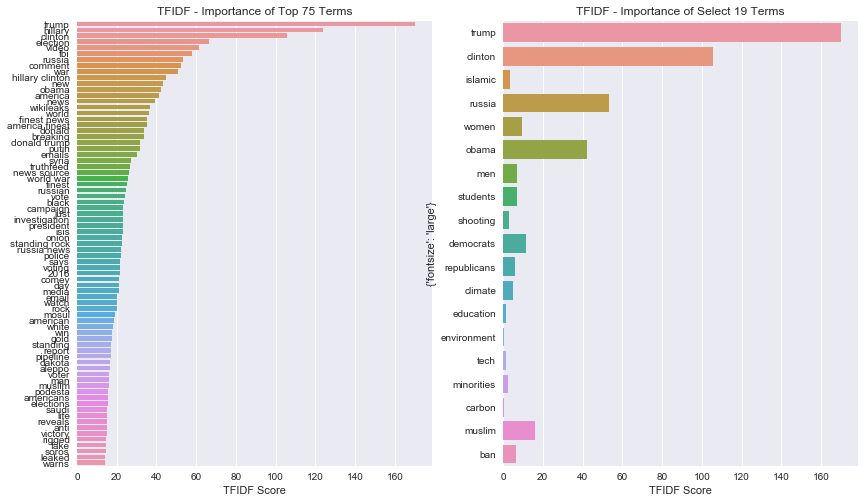

In [29]:
# Plotting the word count and importance
plot_tfidf_scores(scores, termNames, selectScores, selectTerms,  n_words = 18)